# MyFirstPrediction

datasource: https://www.kaggle.com/rounakbanik/pokemon/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/pokemon.csv')

In [3]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
def filter_columns(dataf):
    keep_columns = [
        "pokedex_number",
        "name",
        "attack",
        "speed",
        "defense",
        "hp",
        "sp_attack",
        "sp_defense",
        "is_legendary",
    ]
    return dataf[keep_columns]

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

In [5]:
clean_df = (df
            .pipe(filter_columns)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )
clean_df

,pokedex_number,name,attack,speed,defense,hp,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,49,45,49,45,65,65,0
1,2,Ivysaur,62,60,63,60,80,80,0
2,3,Venusaur,100,80,123,80,122,120,0
3,4,Charmander,52,65,43,39,60,50,0
4,5,Charmeleon,64,80,58,58,80,65,0
...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,101,61,103,97,107,101,1
797,798,Kartana,181,109,131,59,59,31,1
798,799,Guzzlord,101,43,53,223,97,53,1
799,800,Necrozma,107,79,101,97,127,89,1


# For each/a base stat: can we see that a pokemon is legendary?

<AxesSubplot:xlabel='attack', ylabel='defense'>

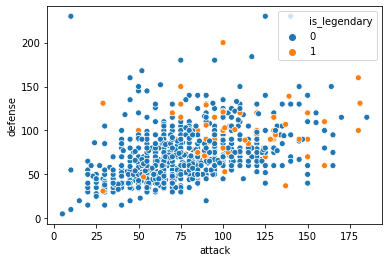

In [6]:
sns.scatterplot(x='attack', y='defense', hue='is_legendary', data=df)

In [7]:
base_stats = ['attack', 'defense', 'speed', 'sp_attack', 'sp_defense']

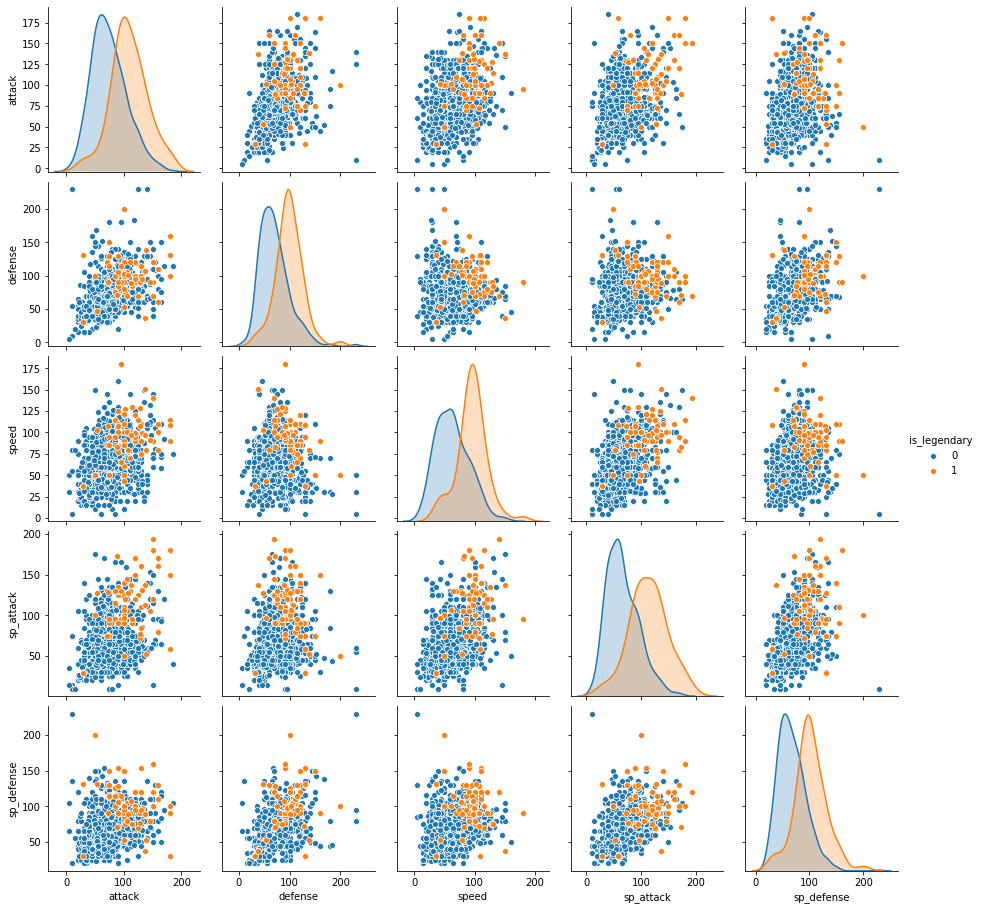

In [8]:
sns.pairplot(df[base_stats + ['is_legendary']], hue='is_legendary')

# Create the most simple prediction system to test

In [9]:
X = df[['attack']]
y = df['is_legendary']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# 'Training'
legendary_mask = y_train == 1
X_train_legendary = X_train[legendary_mask]
X_train_non_legendary = X_train[~legendary_mask]

avg_attack_legendary = X_train_legendary['attack'].mean()

In [13]:
# Testing
y_pred = pd.Series(X_test['attack'] > avg_attack_legendary).astype(int)  

In [29]:
# Evaluate (metrics)
from sklearn.metrics import accuracy_score

# Test accuracy Score
test_acc = accuracy_score(y_test, y_pred)

print(round(test_acc, 3))

0.891


In [27]:
# Evaluate (confusion matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[177,   1],
       [ 21,   2]])

# Step 2: create a more complex classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
classifier = DecisionTreeClassifier()

In [19]:
classifier = classifier.fit(X_train, y_train)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
confusion_matrix(y_pred, y_test)

array([[177,  21],
       [  1,   2]])

In [22]:
decision_tree_acc = accuracy_score(y_pred, y_test)

In [30]:
print(round(decision_tree_acc, 3))

0.891


In [31]:
pd.Series(y_pred).value_counts()

0    198
1      3
dtype: int64

In [32]:
y_test.value_counts()

0    178
1     23
Name: is_legendary, dtype: int64